MT:
1. Make a suitable ROI (circle) and create a mask to separate the flower from the rest of the image. You will generate two outputs one with rectangle and one with circle
2. Create a binary mask of the red block from the given image using color thresholding, then apply the binary mask to separate the block from the background.

OT:
1. Make a rectangular ROI mask for MT-1 and MT-2 and apply the mask.

### **Mandatory Tasks:**  
✅ **Step 1: ROI (Region of Interest) তৈরি করা (বৃত্ত & আয়তক্ষেত্র)**  
- ছবির মধ্যে **ফুলটি আলাদা** করতে হবে।  
- প্রথমে **একটি বৃত্তাকার ROI** এবং **একটি আয়তাকার ROI** তৈরি করতে হবে।  
- এরপর **একটি মাস্ক** বানিয়ে ফুলটি আলাদা করতে হবে।  
- **ফলাফল:**  
  - একটি ছবি যেখানে ফুলটি **আয়তক্ষেত্র দিয়ে চিহ্নিত** থাকবে।  
  - একটি ছবি যেখানে ফুলটি **বৃত্ত দিয়ে চিহ্নিত** থাকবে।  

✅ **Step 2: রঙ থ্রেশোল্ডিং ব্যবহার করে লাল ব্লক আলাদা করা**  
- ছবির **লাল অংশ (red block)** আলাদা করতে হবে।  
- OpenCV-এর **color thresholding** পদ্ধতি ব্যবহার করতে হবে।  
- লাল অংশের **একটি বাইনারি মাস্ক** (black & white) তৈরি করতে হবে।  
- এই **মাস্কটি ছবির উপর প্রয়োগ** করে লাল ব্লকটি ব্যাকগ্রাউন্ড থেকে আলাদা করতে হবে।  



### **Optional Task:**  
✅ **Step 3: MT-1 এবং MT-2 এর জন্য ROI মাস্ক তৈরি করা**  
- **MT-1 ও MT-2** নামে দুটি অংশ চিহ্নিত করা হবে।  
- **আয়তক্ষেত্র (Rectangle) ROI** ব্যবহার করতে হবে।  
- এই মাস্ক ব্যবহার করে **MT-1 এবং MT-2 আলাদা** করতে হবে।  



### Make a suitable ROI (circle) and create a mask to separate the flower from the rest of the image. You will generate two outputs one with rectangle and one with circle

[inRange](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)

# MT-1

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive

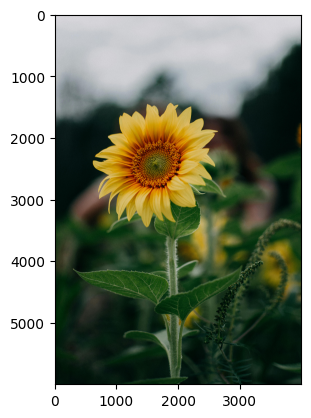

In [2]:
img = '/content/drive/MyDrive/CV image/pexels-maxandrey-1366630.jpg'
image = plt.imread(img)
plt.imshow(image)

In [56]:
# img = '/content/drive/MyDrive/CV image/pexels-maxandrey-1366630.jpg'
# image = cv2.imread(img)
# cv2_imshow(image)

In [57]:
print(image.shape)

(6000, 4000, 3)


In [64]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width = image.shape[:2] # skip channel

In [65]:
# Create a mask for the rectangular ROI
mask_rectangle = np.zeros((height, width), dtype=np.uint8)

# ROI for Rectangle
sqr_size = 1000

# top_left_x = (width - sqr_size)//2 # 1600
# top_left_y = (height - sqr_size)//2 # 2600

top_left_x = 1000  # Adjust horizontal position
top_left_y = 2000  # Adjust vertical position

bottom_right_x = top_left_x + sqr_size # 2400
bottom_right_y = top_left_y + sqr_size # 3400

mask_rectangle[top_left_y: top_left_y + sqr_size, top_left_x : top_left_x + sqr_size] = 255

print(mask_rectangle[top_left_y: top_left_y + sqr_size, top_left_x : top_left_x + sqr_size])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [79]:
# Define the circle ROI (center_x, center_y, radius)
cx, cy, r = 1500, 2700, 1000

# Create a mask for the Circle ROI
mask_circle = np.zeros((height, width), dtype=np.uint8)

cv2.circle(mask_circle, (cx, cy), r, 255, -1) # White circle

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [51]:
# plt.imshow(mask_rectangle, cmap='gray')

In [67]:
mask_rgb = cv2.cvtColor(mask_rectangle, cv2.COLOR_GRAY2RGB)

mask_rgb = cv2.cvtColor(mask_circle, cv2.COLOR_GRAY2RGB)

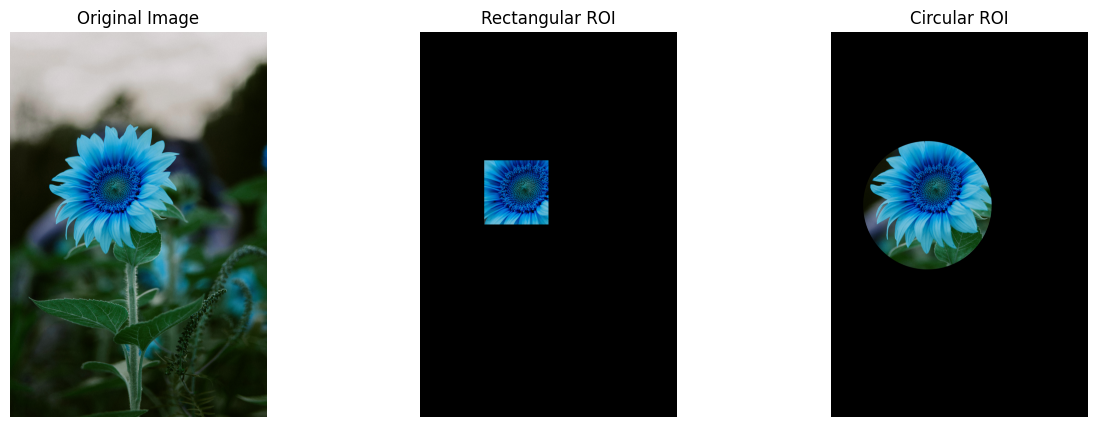

In [80]:
# Apply mask

flower_rectangle = cv2.bitwise_and(image_rgb, image_rgb, mask = mask_rectangle)
# plt.imshow(masked_image)

flower_circle = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_circle)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(flower_rectangle)
ax[1].set_title("Rectangular ROI")
ax[1].axis("off")

ax[2].imshow(flower_circle)
ax[2].set_title("Circular ROI")
ax[2].axis("off")

plt.show()

# MT-2

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

(np.float64(-0.5), np.float64(443.5), np.float64(387.5), np.float64(-0.5))

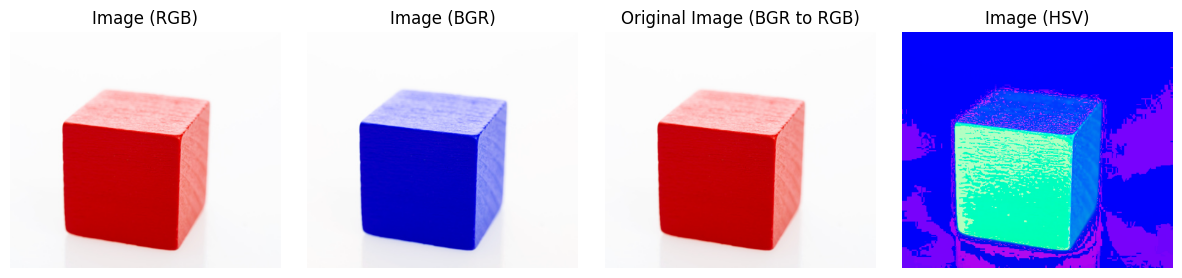

In [6]:
img_path = '/content/drive/MyDrive/CV image/red_block.jpg'

img = cv2.imread(img_path) # Loads in BGR format (OpenCV default) #for OpneCV: Default format: BGR (Blue, Green, Red)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR → RGB for Matplotlib

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # Convert BGR → HSV

img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR) # Convert RGB -> BGR

fig, axis = plt.subplots(1, 4, figsize=(15, 5))
plt.subplots_adjust(hspace=0.4, wspace=0.1)

axis[0].imshow(img_rgb)
axis[0].set_title('Image (RGB)')
axis[0].axis("off")

axis[1].imshow(img_bgr)  # BGR to BGR (No change)
axis[1].set_title('Image (BGR)')
axis[1].axis("off")

axis[2].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert to RGB for correct display
axis[2].set_title('Original Image (BGR to RGB)')
axis[2].axis("off")

axis[3].imshow(img_hsv)
axis[3].set_title('Image (HSV)')
axis[3].axis("off")

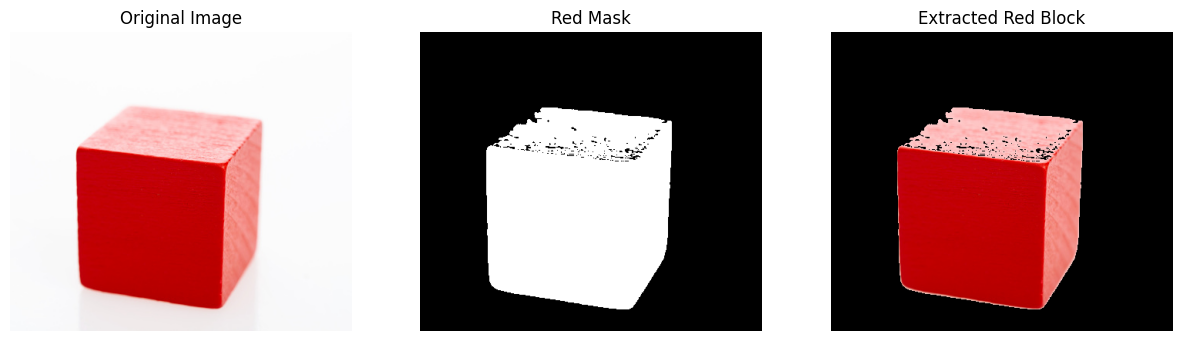

In [7]:
# Define range of blue color in HSV
lower_red1 = np.array([0, 50, 50]) # hue, saturation, brightness
upper_red1 = np.array([10, 255, 255]) # hue, saturation, brightness
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# The reason for using two sets of lower and upper bounds (lower_red1, upper_red1 and lower_red2, upper_red2)
# is because red color appears in two different hue ranges in the HSV color space.

#Threshold the HSV image to get only blue colors
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1) # cv2.inRange(input_image, lower_bound, upper_bound)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2) # cv2.inRange(input_image, lower_bound, upper_bound)
mask_red = cv2.bitwise_or(mask1, mask2) # This function combines two masks using a pixel-wise logical OR operation.

# Devide the red block -> binary mask to separate the block from the background
red_block = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)
# result = cv2.bitwise_and(src1, src2, mask=mask)
# This function performs a bitwise AND operation between corresponding pixels of src1 and src2,
# but only for pixels where the mask is non-zero (white, 255).

# Display image using Matplotlib

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].imshow(img_rgb)
axis[0].set_title("Original Image")
axis[0].axis("off")

axis[1].imshow(mask_red, cmap="gray")
axis[1].set_title("Red Mask")
axis[1].axis("off")

axis[2].imshow(red_block)
axis[2].set_title("Extracted Red Block")
axis[2].axis("off")

plt.show()

In the function:  

```python
red_block = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)
```

we are using `img_rgb` twice as **src1** and **src2** because:  

### **Understanding `cv2.bitwise_and()`**
The syntax for `cv2.bitwise_and()` is:
```python
result = cv2.bitwise_and(src1, src2, mask=mask)
```
This function performs a **bitwise AND** operation between corresponding pixels of `src1` and `src2`, but only for pixels where the `mask` is **non-zero (white, 255)**.  

### **Why Use `img_rgb` Twice?**
We want to keep only the red block **while making everything else black**.  
- Using `img_rgb` as **both `src1` and `src2`** means the operation is applied to the **same image**.
- The `mask=mask_red` ensures that only pixels **within the red block** remain unchanged, while all other pixels become black.

### **What Happens Pixel-Wise?**
For each pixel **(R, G, B)** in `img_rgb`:
- If `mask_red` = **255** (white): `img_rgb AND img_rgb` → Keeps the pixel unchanged.
- If `mask_red` = **0** (black): `img_rgb AND img_rgb` → Becomes black `(0, 0, 0)`.

### **Alternative Approach**
We could also write:
```python
red_block = cv2.bitwise_and(img_rgb, (255, 255, 255), mask=mask_red)
```
But this would only keep the red block in white color, which is **not what we want**.

### **Final Thoughts**
✅ Using `img_rgb` twice ensures that only red pixels from the original image remain, and everything else is black. 🚀